In [54]:
import matplotlib.pyplot as plt
import numpy as np
import cv2
import os
import PIL # it is a image library
import tensorflow as tf
import keras

from tensorflow.keras import models, layers, optimizers, Sequential

In [3]:
dataset_url= "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
data_dir =tf.keras.utils.get_file('flower_photos', origin=dataset_url, cache_dir='.', untar=True)# folder name, origin of the data, the directory you want to save the file, if you want to save the file in current dir then simply use dot, untar is for unzipping the file.

228813984/228813984 [==============================] - 13s 0us/step


In [4]:
data_dir

'./datasets/flower_photos'

In [6]:
import pathlib
data_dir= pathlib.Path(data_dir)
data_dir

PosixPath('datasets/flower_photos')

In [10]:
image_count=len(list(data_dir.glob('*/*.jpg'))) # this will give all the flowers whose extension is jpg

In [11]:
image_count

3670

In [13]:
roses= list(data_dir.glob('roses/*')) #it will give you only the roses
roses[:5]

[PosixPath('datasets/flower_photos/roses/16209331331_343c899d38.jpg'),
 PosixPath('datasets/flower_photos/roses/5777669976_a205f61e5b.jpg'),
 PosixPath('datasets/flower_photos/roses/4860145119_b1c3cbaa4e_n.jpg'),
 PosixPath('datasets/flower_photos/roses/15011625580_7974c44bce.jpg'),
 PosixPath('datasets/flower_photos/roses/17953368844_be3d18cf30_m.jpg')]

In [18]:
sunflowers= list(data_dir.glob('sunflowers/*'))
sunflowers[:5]

[PosixPath('datasets/flower_photos/sunflowers/6204049536_1ac4f09232_n.jpg'),
 PosixPath('datasets/flower_photos/sunflowers/18828283553_e46504ae38.jpg'),
 PosixPath('datasets/flower_photos/sunflowers/8021568040_f891223c44_n.jpg'),
 PosixPath('datasets/flower_photos/sunflowers/4942258704_c4146b710a_n.jpg'),
 PosixPath('datasets/flower_photos/sunflowers/5979668702_fdaec9e164_n.jpg')]

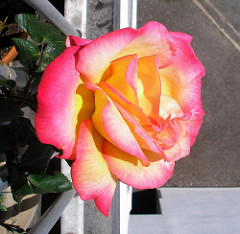

In [17]:
PIL.Image.open(str(roses[10]))

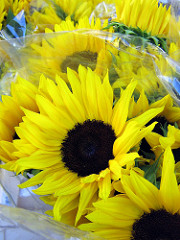

In [19]:
PIL.Image.open(str(sunflowers[12]))

In [21]:
flowers_image_dict={
    'roses':list(data_dir.glob('roses/*')),
    'sunflowers':list(data_dir.glob('sunflowers/*')),
    'daisy':list(data_dir.glob('daisy/*')),
    'dandelion':list(data_dir.glob('dandelion/*')),
    'tulips':list(data_dir.glob('tulips/*')),
}

In [23]:
flowers_image_dict['daisy']

[PosixPath('datasets/flower_photos/daisy/14167534527_781ceb1b7a_n.jpg'),
 PosixPath('datasets/flower_photos/daisy/5512287917_9f5d3f0f98_n.jpg'),
 PosixPath('datasets/flower_photos/daisy/476857510_d2b30175de_n.jpg'),
 PosixPath('datasets/flower_photos/daisy/521762040_f26f2e08dd.jpg'),
 PosixPath('datasets/flower_photos/daisy/7320089276_87b544e341.jpg'),
 PosixPath('datasets/flower_photos/daisy/8008258043_5457dd254b_n.jpg'),
 PosixPath('datasets/flower_photos/daisy/721595842_bacd80a6ac.jpg'),
 PosixPath('datasets/flower_photos/daisy/8719756744_34a5a83976_n.jpg'),
 PosixPath('datasets/flower_photos/daisy/5110107234_12ddc0206b_m.jpg'),
 PosixPath('datasets/flower_photos/daisy/20773528301_008fcbc5a1_n.jpg'),
 PosixPath('datasets/flower_photos/daisy/144076848_57e1d662e3_m.jpg'),
 PosixPath('datasets/flower_photos/daisy/510844526_858b8fe4db.jpg'),
 PosixPath('datasets/flower_photos/daisy/5632774792_0fa33d17eb_n.jpg'),
 PosixPath('datasets/flower_photos/daisy/12891819633_e4c82b51e8.jpg'),
 Pos

In [24]:
flowers_labels_dict={
    'roses':0,
    'daisy':1,
    'dandelion':2,
    'sunflowers':3,
    'tulips':4,
}

In [26]:
img = cv2.imread(str(flowers_image_dict['roses'][0])) # changes the image into numpy array

In [27]:
img.shape

(243, 500, 3)

In [28]:
cv2.resize(img,(180,180)).shape

(180, 180, 3)

In [31]:
x, y=[],[]

for flower_name, images in flowers_image_dict.items():
    #print(flower_name)
    #print(len(images))
    for image in images:
        img= cv2.imread(str(image))
        resized_img= cv2.resize(img(180,180))
        x.append(resized_img)
        y.append(flowers_labels_dict[flower_name])

TypeError: 'numpy.ndarray' object is not callable

In [32]:
import cv2

x, y = [], []

for flower_name, images in flowers_image_dict.items():
    # Iterate over each image in the list of images for the current flower
    for image in images:
        img = cv2.imread(str(image))  # Read the image
        if img is not None:
            resized_img = cv2.resize(img, (180, 180))  # Resize the image to 180x180
            x.append(resized_img)  # Append the resized image to the x list
            y.append(flowers_labels_dict[flower_name])  # Append the corresponding label to the y list
        else:
            print(f"Error reading image: {image}")

# Now, x contains the resized images and y contains the corresponding labels


In [33]:
y[:5]

[0, 0, 0, 0, 0]

In [34]:
x[0]

array([[[  2,   0,   2],
        [ 10,   5,   1],
        [ 89,  85,  97],
        ...,
        [244, 245, 243],
        [244, 245, 243],
        [244, 245, 243]],

       [[ 14,  33,  73],
        [  6,   1,   2],
        [ 92,  90, 105],
        ...,
        [243, 244, 242],
        [244, 245, 243],
        [243, 244, 242]],

       [[122, 176, 224],
        [ 10,   1,   2],
        [ 72,  80,  84],
        ...,
        [244, 245, 243],
        [244, 245, 243],
        [244, 245, 243]],

       ...,

       [[147, 109,  85],
        [145, 109,  85],
        [144, 108,  84],
        ...,
        [155, 122,  96],
        [152, 121,  95],
        [149, 118,  93]],

       [[148, 114,  91],
        [154, 120,  96],
        [146, 112,  88],
        ...,
        [155, 125,  98],
        [153, 121,  95],
        [152, 122,  93]],

       [[153, 119,  96],
        [151, 117,  93],
        [152, 117,  94],
        ...,
        [154, 124,  97],
        [153, 121,  95],
        [153, 123,  94]]

In [35]:
x=np.array(x)
y= np.array(y)

In [36]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test= train_test_split(x,y ,random_state=0)

In [37]:
len(x_train)

2752

In [39]:
#normalized the data 
x_train_scale= x_train/ 255
x_test_scale= x_test/255

In [47]:
cnn= Sequential([
    layers.Conv2D(filters= 16, kernel_size=(3,3), padding='same', activation='relu'),
    layers.MaxPooling2D(2,2),
    layers.Conv2D(filters= 32, kernel_size=(3,3), padding='same', activation='relu'),
    layers.MaxPooling2D(2,2),
    layers.Conv2D(filters= 64, kernel_size=(3,3), padding='same', activation='relu'),
    layers.MaxPooling2D(2,2),
    layers.Flatten(), # we are using flatten beacause before this we had 2d array and dense layers accpet only 1d so it converts that for us
    layers.Dense(units= 120, activation='relu'),
    layers.Dense(units= 5, activation='linear'),

])

cnn.compile(optimizer= 'adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy']
              )

In [48]:
cnn.fit(x_train_scale, y_train, epochs=50)

Epoch 1/50


2024-07-04 10:12:27.371921: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:117] Plugin optimizer for device_type GPU is enabled.


86/86 [==============================] - 8s 50ms/step - loss: 1.5507 - accuracy: 0.2940
Epoch 2/50
86/86 [==============================] - 4s 50ms/step - loss: 1.1778 - accuracy: 0.5007
Epoch 3/50
86/86 [==============================] - 4s 50ms/step - loss: 1.0494 - accuracy: 0.6032
Epoch 4/50
86/86 [==============================] - 4s 49ms/step - loss: 0.9975 - accuracy: 0.6359
Epoch 5/50
86/86 [==============================] - 4s 49ms/step - loss: 1.3704 - accuracy: 0.6112
Epoch 6/50
86/86 [==============================] - 4s 49ms/step - loss: 0.8123 - accuracy: 0.7104
Epoch 7/50
86/86 [==============================] - 4s 49ms/step - loss: 1.1637 - accuracy: 0.6766
Epoch 8/50
86/86 [==============================] - 4s 49ms/step - loss: 0.8390 - accuracy: 0.7355
Epoch 9/50
86/86 [==============================] - 4s 50ms/step - loss: 0.9823 - accuracy: 0.7453
Epoch 10/50
86/86 [==============================] - 4s 49ms/step - loss: 1.5811 - accuracy: 0.7224
Epoch 11/50
86/86 [=

In [49]:
cnn.evaluate(x_test_scale, y_test)#overfitting

29/29 [==============================] - 1s 19ms/step - loss: 134736.5625 - accuracy: 0.3486


[134736.5625, 0.3485838770866394]

In [50]:
predictions = cnn.predict(x_test_scale)
predictions

29/29 [==============================] - 1s 13ms/step


array([[ -841039.  ,  -587541.44,  -782094.06,   -83074.1 ,  -686843.8 ],
       [ 2084224.2 ,  1806690.  ,  1671904.1 ,  1649989.4 ,  2000775.9 ],
       [-1095229.2 ,  -924493.8 ,  -772850.06,  -717612.4 ,  -832441.  ],
       ...,
       [-6076785.  , -5665262.5 , -4915337.5 , -4646063.  , -5174151.  ],
       [ 2570726.  ,  2139522.8 ,  2130913.8 ,  2273286.8 ,  2584435.5 ],
       [-1478242.1 , -1291380.6 , -1250649.6 , -1116978.6 , -1201115.1 ]],
      dtype=float32)

In [51]:
score= tf.nn.softmax(predictions[0])
score

<tf.Tensor: shape=(5,), dtype=float32, numpy=array([0., 0., 0., 1., 0.], dtype=float32)>

In [52]:
np.argmax(score)

3

In [53]:
y_test[0]

3

In [59]:
#data augmentation
data_augmentation= keras.Sequential([
    layers.experimental.preprocessing.RandomZoom(0.1),
    layers.experimental.preprocessing.RandomRotation(0.1),
])

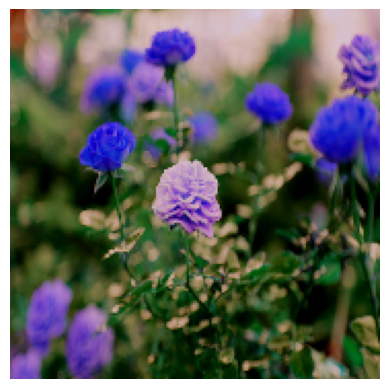

In [57]:
plt.axis('off')
plt.imshow(x[1])

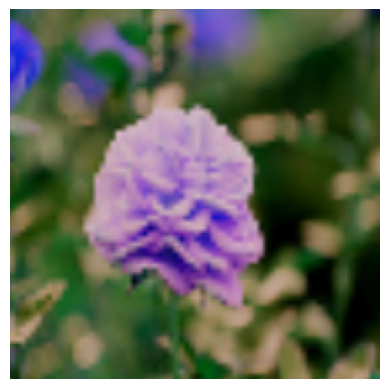

In [60]:
plt.axis('off')
plt.imshow(data_augmentation(x)[1].numpy().astype('uint8'))

In [61]:
cnn= Sequential([
    data_augmentation,
    layers.Conv2D(filters= 16, kernel_size=(3,3), padding='same', activation='relu'),
    layers.MaxPooling2D(2,2),
    layers.Conv2D(filters= 32, kernel_size=(3,3), padding='same', activation='relu'),
    layers.MaxPooling2D(2,2),
    layers.Conv2D(filters= 64, kernel_size=(3,3), padding='same', activation='relu'),
    layers.MaxPooling2D(2,2),
    layers.Dropout(0.2),# it will drop 20% of the neurons and give us better generalization
    layers.Flatten(), # we are using flatten beacause before this we had 2d array and dense layers accpet only 1d so it converts that for us
    layers.Dense(units= 120, activation='relu'),
    layers.Dense(units= 5, activation='linear'),

])

cnn.compile(optimizer= 'adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy']
              )

In [62]:
cnn.fit(x_train_scale, y_train,epochs=30)

Epoch 1/30
86/86 [==============================] - 6s 60ms/step - loss: 1.5674 - accuracy: 0.3383
Epoch 2/30
86/86 [==============================] - 5s 59ms/step - loss: 1.3541 - accuracy: 0.4313
Epoch 3/30
86/86 [==============================] - 5s 60ms/step - loss: 1.6110 - accuracy: 0.3685
Epoch 4/30
86/86 [==============================] - 5s 59ms/step - loss: 1.4612 - accuracy: 0.3964
Epoch 5/30
86/86 [==============================] - 5s 60ms/step - loss: 1.4010 - accuracy: 0.4502
Epoch 6/30
86/86 [==============================] - 5s 62ms/step - loss: 1.6531 - accuracy: 0.4731
Epoch 7/30
86/86 [==============================] - 5s 62ms/step - loss: 2.5402 - accuracy: 0.3895
Epoch 8/30
86/86 [==============================] - 5s 61ms/step - loss: 1.6270 - accuracy: 0.4640
Epoch 9/30
86/86 [==============================] - 5s 61ms/step - loss: 1.6088 - accuracy: 0.4662
Epoch 10/30
86/86 [==============================] - 5s 60ms/step - loss: 1.2982 - accuracy: 0.5323
Epoch 11/

In [63]:
cnn.evaluate(x_test_scale, y_test)

29/29 [==============================] - 1s 17ms/step - loss: 13.9774 - accuracy: 0.4695


[13.977373123168945, 0.4694989025592804]